# Project 3 - Regression

### Created by Jonathan Corll

Read in CSV files

In [ ]:
# !pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway, pearsonr


In [51]:
# train set

train_data = pd.read_csv(r"C:\Users\jonat\Downloads\house-prices-advanced-regression-techniques\train.csv")

In [52]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
# test set

test_data = pd.read_csv(r"C:\Users\jonat\Downloads\house-prices-advanced-regression-techniques\test.csv")

In [54]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Understanding the data

In [55]:
# Learn more about the dataset

# find the shape of the train dataset
print(train_data.shape)

(1460, 81)


In [56]:
# drop the ID column because the ID is not relevant for prediction
train_data = train_data.drop('Id', axis=1)
train_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
# find the table information
print(train_data.describe())

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

In [58]:
# create variables for the feature types so I can see the correlation between features

num_features = train_data.select_dtypes(include=['int64', 'float64']).columns
cat_features = train_data.select_dtypes(include=['object', 'category']).columns

print(f"\nNumeric columns ({len(num_features)}): {num_features.tolist()}")
print(f"Categorical columns ({len(cat_features)}): {cat_features.tolist()}")


Numeric columns (37): ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical columns (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firepl

In [59]:
missing = train_data.isnull().mean().sort_values(ascending=False)
print("\nColumns with missing values (>0%):")
print(missing[missing > 0])


Columns with missing values (>0%):
PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageQual      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtFinType1    0.025342
BsmtCond        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64


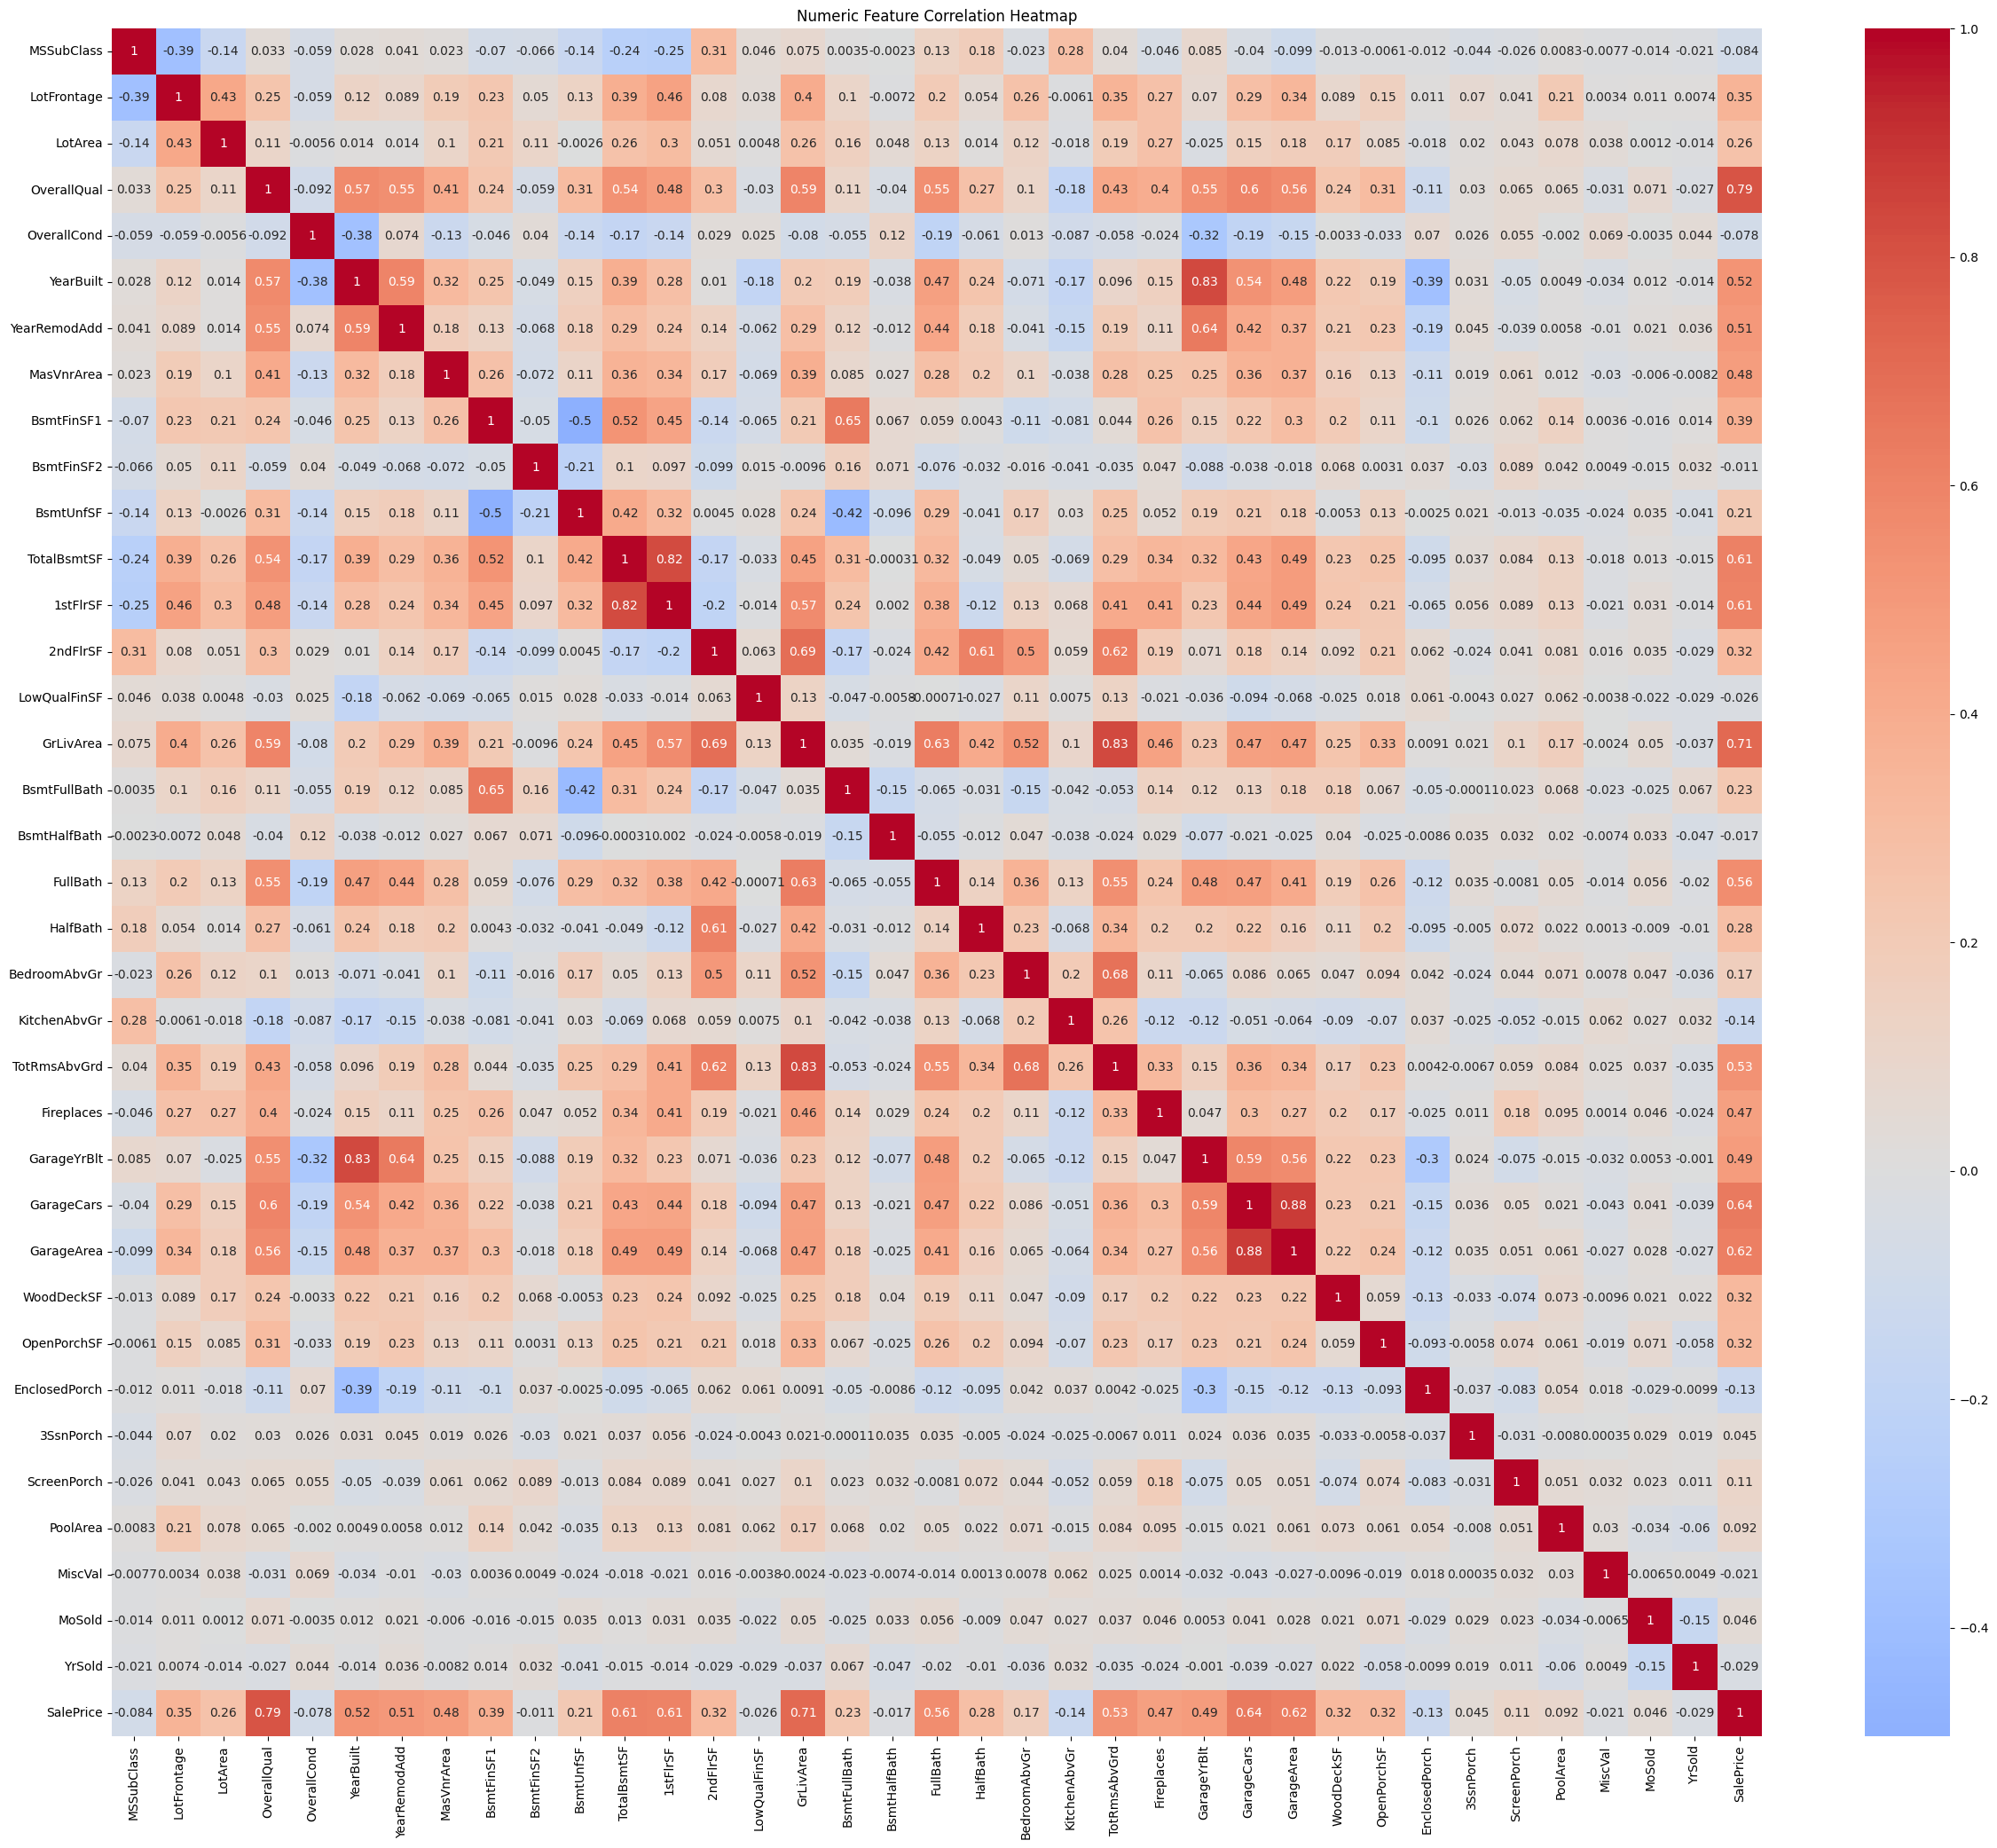

In [60]:
# display the correlation matrix for the numeric features

corr= train_data[num_features].corr()

plt.figure(figsize=(30,25))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

In [61]:
target_corr = corr['SalePrice'].sort_values(ascending=False)
print("\nTop 10 features positively correlated with SalePrice:")
print(target_corr.head(10))
print("\nTop 10 features negatively correlated with SalePrice:")
print(target_corr.tail(10))


Top 10 features positively correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Top 10 features negatively correlated with SalePrice:
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [62]:
high_corr_pairs = (
    corr.where(lambda x: abs(x) > 0.8)
    .stack()
    .reset_index()
    .query('level_0 != level_1')
)
print("\nHighly correlated feature pairs (>|0.8|):")
print(high_corr_pairs.head(10))



Highly correlated feature pairs (>|0.8|):
         level_0       level_1         0
6      YearBuilt   GarageYrBlt  0.825667
13   TotalBsmtSF      1stFlrSF  0.819530
14      1stFlrSF   TotalBsmtSF  0.819530
19     GrLivArea  TotRmsAbvGrd  0.825489
26  TotRmsAbvGrd     GrLivArea  0.825489
29   GarageYrBlt     YearBuilt  0.825667
32    GarageCars    GarageArea  0.882475
33    GarageArea    GarageCars  0.882475


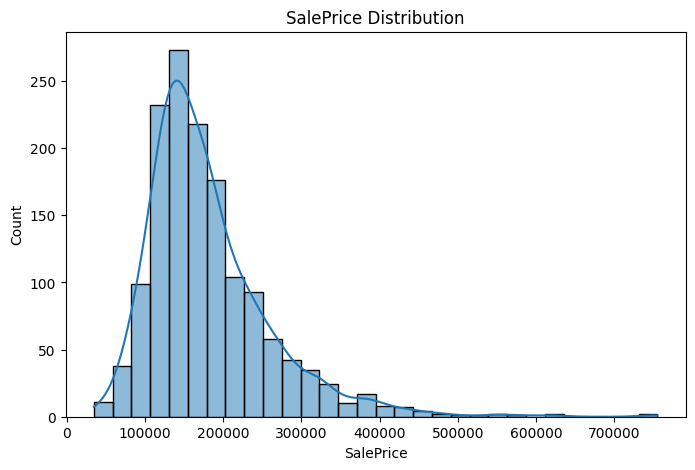

In [63]:
plt.figure(figsize=(8, 5))
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('SalePrice Distribution')
plt.show()

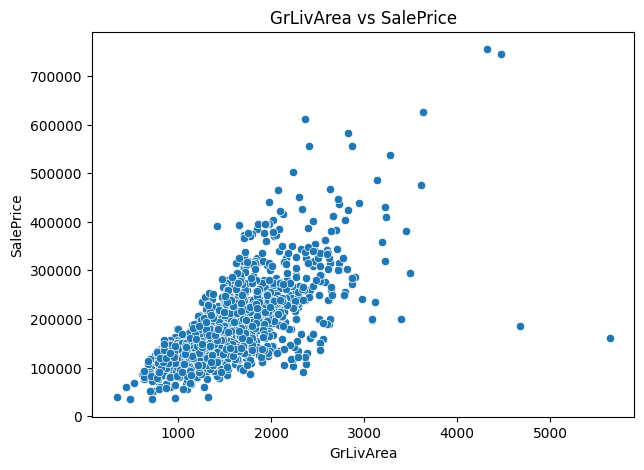

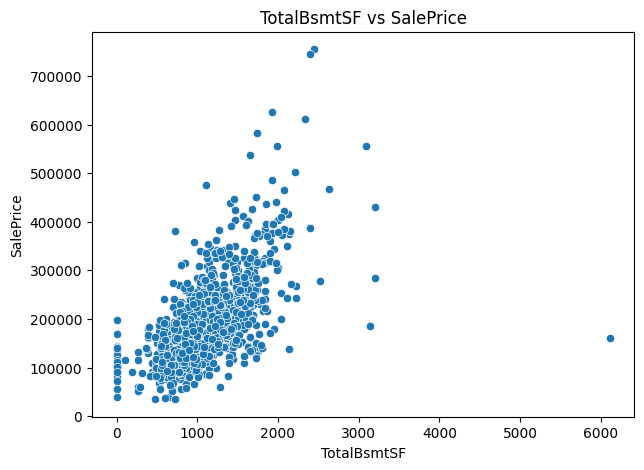

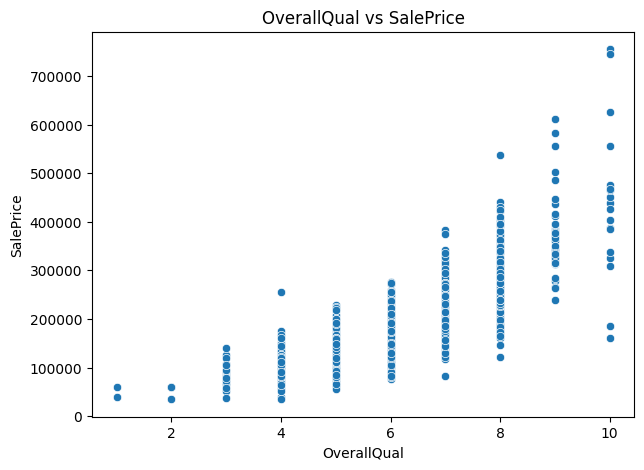

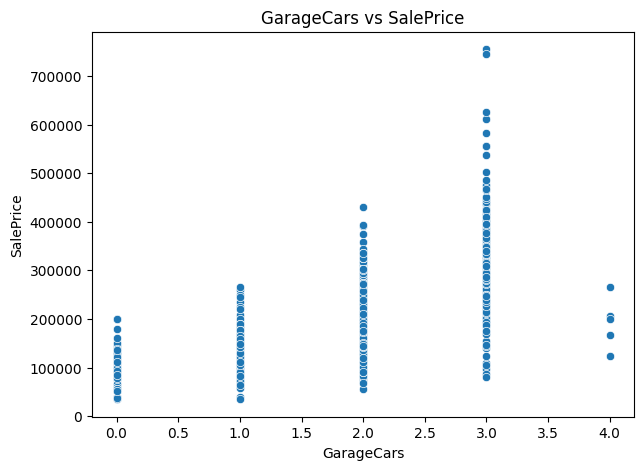

In [64]:
for col in ['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageCars']:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=train_data, x=col, y='SalePrice')
    plt.title(f'{col} vs SalePrice')
    plt.show()

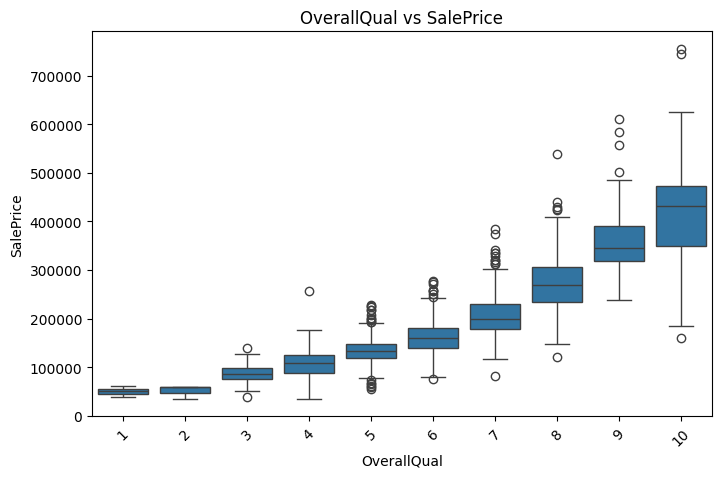

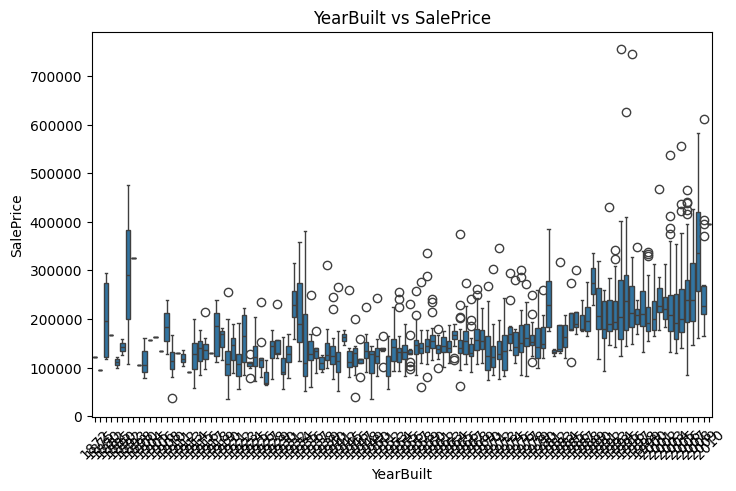

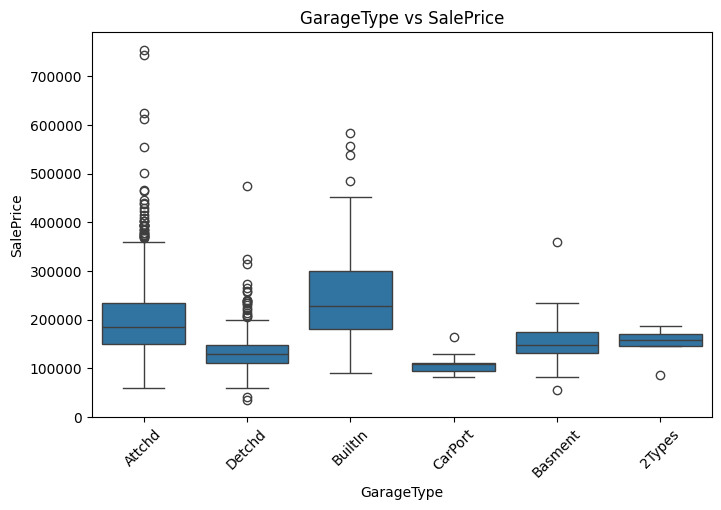

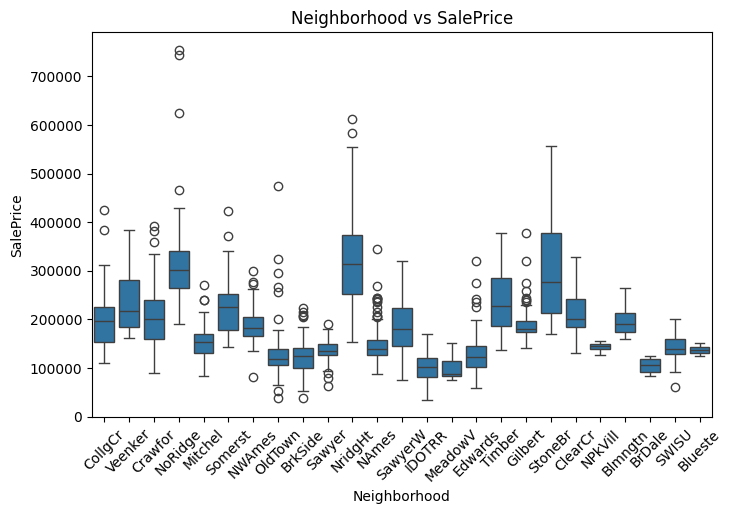

In [65]:
for col in ['OverallQual', 'YearBuilt', 'GarageType', 'Neighborhood']:
    if col in train_data.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=train_data, x=col, y='SalePrice')
        plt.xticks(rotation=45)
        plt.title(f'{col} vs SalePrice')
        plt.show()

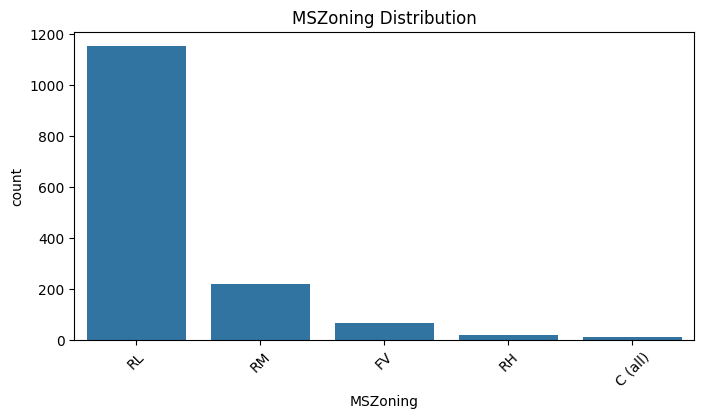

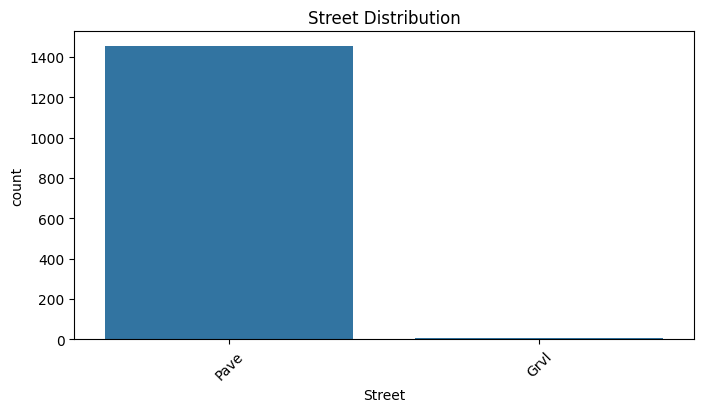

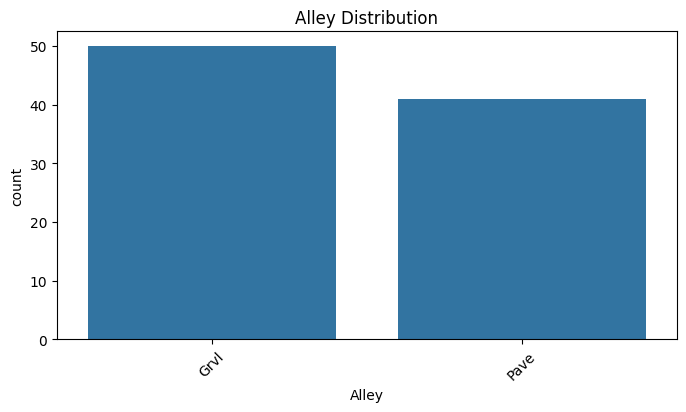

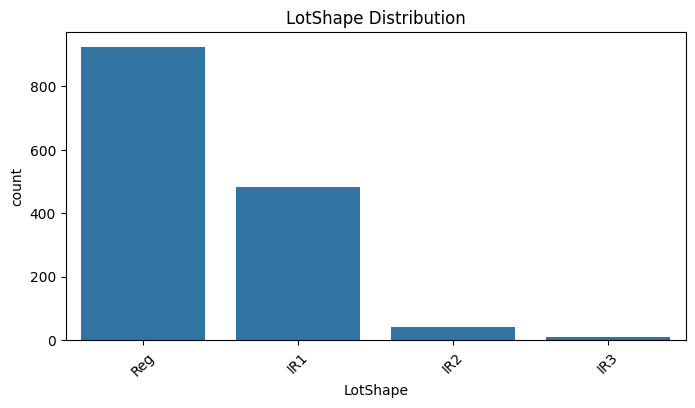

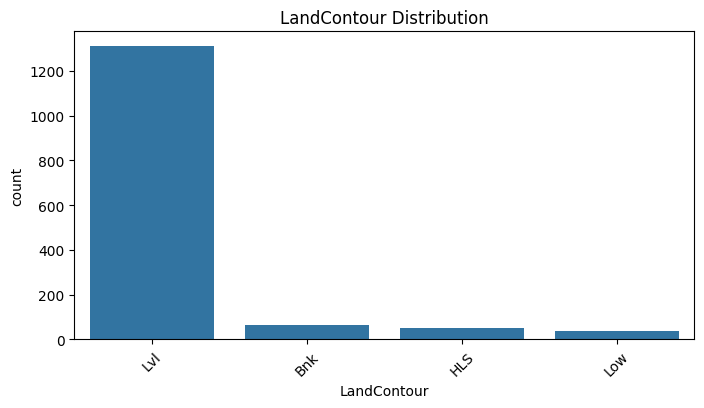

In [66]:
for col in cat_features[:5]:  # first 5 categorical features
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_data, x=col, order=train_data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution')
    plt.show()

# Pre-Processing

In [67]:
drop_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']
train_data.drop(columns=drop_cols, inplace=True)

In [68]:
for col in num_features:
    if train_data[col].isnull().any():
        train_data[col].fillna(train_data[col].median(), inplace=True)

C:\Users\jonat\AppData\Local\Temp\ipykernel_26668\1884465588.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_26668\1884465588.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [69]:
for col in cat_features:
    if col in train_data.columns and train_data[col].isnull().any():
        train_data[col].fillna(train_data[col].mode()[0], inplace=True)

C:\Users\jonat\AppData\Local\Temp\ipykernel_26668\3260250464.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)


In [70]:
drop_corr_cols = ['GarageArea', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt']
train_data.drop(columns=[c for c in drop_corr_cols if c in train_data.columns], inplace=True)

In [71]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
            'FullBath', 'YearBuilt']
target = 'SalePrice'

X = train_data[features].copy()
y = train_data[target].copy()


In [72]:
y = np.log1p(y)
X['GrLivArea'] = np.log1p(X['GrLivArea'])

In [74]:
print("Remaining missing values:", X.isnull().sum().sum(), " | X Shape:", X.shape, " | Y Shape:", y.shape)

Remaining missing values: 0  | X Shape: (1460, 6)  | Y Shape: (1460,)


# Modeling

In [ ]:
# !pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [82]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Model Evaluation

In [84]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [88]:
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")

Train RMSE: 0.1677963274208369
Test RMSE: 0.17397275125601755


In [89]:
if rmse_train < rmse_test:
    print("Possible overfitting: model performs better on training data.")
else:
    print("Model generalizes well or is slightly underfitting.")

Possible overfitting: model performs better on training data.


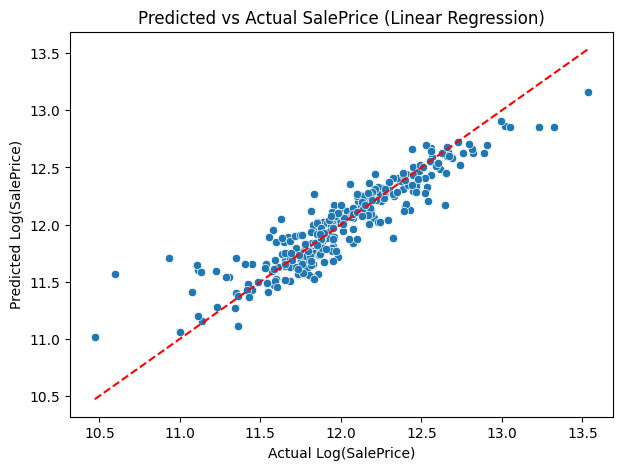

In [90]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel("Actual Log(SalePrice)")
plt.ylabel("Predicted Log(SalePrice)")
plt.title("Predicted vs Actual SalePrice (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()